In [1]:
from sklearn import datasets, model_selection
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
def scatter_dataset(X,y):
    for i in range(int(np.max(y))+1):
        plt.scatter(X[y==i][:,0],X_train[y==i][:,1],s=10)
        plt.scatter(X[y==i][:,0],X_train[y==i][:,1],s=10)
    plt.show()
    
    

def plot_contours(ax, model, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z[Z<0]=0
    Z[Z>0]=1
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, 1,**params)
    return out

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 2, x.max() + 2
    y_min, y_max = y.min() - 2, y.max() + 2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy    

def plot_decision_boundaries(ax, model):
    return

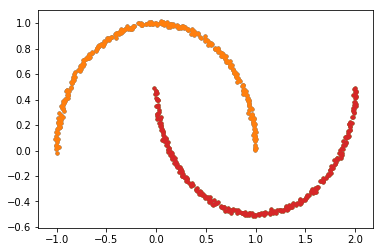

In [3]:
X,y = datasets.make_moons(n_samples=1000,noise=0.01)
# X = np.random.randn(1000,2)
# y = np.ones(1000)
# X = np.concatenate([np.random.multivariate_normal([-1.5,0],np.eye(2)/10,1000),np.random.multivariate_normal([+1.5,0],np.eye(2)/10,1000)])
# y = np.concatenate([np.ones(1000),np.ones(1000)])
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=42)
scatter_dataset(X_train,y_train)

In [4]:
class Model ():
    
    def __init__(self, sess, batch_size = 100, x_dim=2, nb_class = 2, lr_d = 0.01, lr_g = 0.01,
                 z_dim = 2, print_frequency=199, nb_epoch = 100,verbose=True):
        self.sess = sess
        self.z_dim = z_dim
        self.x_dim = x_dim
        self.nb_class = nb_class
        self.nb_epoch = nb_epoch
        self.batch_size = batch_size
        self.verbose = verbose
        self.print_frequency = print_frequency
        self.lr_d = lr_d
        self.lr_g = lr_g
        
        self.build_model()

    def generator(self, z, reuse=False):
        with tf.variable_scope("generator") as scope:
            if reuse:
                scope.reuse_variables()
            h = tf.layers.dense(z,20, activation=tf.nn.relu)
#             h = tf.layers.dense(h,20, activation=tf.nn.relu)
            h = tf.layers.dense(h,self.x_dim)
            return h

    def discriminator(self, inp, reuse=False):
        with tf.variable_scope("discriminator") as scope:
            if reuse:
                scope.reuse_variables()
            h = tf.layers.dense(inp,40, activation=tf.nn.relu)
#             h = tf.layers.dense(h,2, activation=tf.nn.relu)
#             h = tf.layers.dense(h,20, activation=tf.nn.relu)
            layer = h
            h = tf.layers.dense(h,1)
            return h, layer

    def build_model(self):
        self.input = tf.placeholder(tf.float32,[None,self.x_dim], name='input_data')
        self.z = tf.placeholder(tf.float32, [None,self.z_dim],name='z_seed')
         
        self.G = tf.random_uniform(shape=[self.batch_size, self.x_dim],minval=-3,maxval=3)
#         self.G = self.generator(self.z,reuse=False)
        self.D, self.layer = self.discriminator(self.input, reuse=False)
        self.D_, self.layer_ = self.discriminator(self.G, reuse=True)
        
        self.d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=self.D,labels=tf.ones_like(self.D)))
        self.d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=self.D_,labels=tf.zeros_like(self.D_)))
        self.d_loss = self.d_loss_fake + self.d_loss_real
        self.fm_loss = tf.reduce_mean(tf.reduce_mean(tf.abs(self.layer-self.layer_),axis=0))
#         self.fm_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=self.D_,labels=tf.ones_like(self.D)))

        
        self.prediction = tf.greater(self.D, 0)
        self.inference = tf.cast(self.prediction,tf.int32)
#         self.correct = tf.equal(self.prediction, tf.equal(label,1.0))
#         self.accuracy = tf.reduce_mean( tf.cast(self.correct, tf.float32))
#         self.accuracy = self.prediction
        
        t_vars = tf.trainable_variables()
        self.d_vars = [var for var in t_vars if 'discriminator' in var.name]
        self.g_vars = [var for var in t_vars if 'generator' in var.name]    
        

    def train(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.X_train2 = X_train.copy()
        self.nb_examples = self.X_train.shape[0]
        self.nb_step = self.nb_examples//self.batch_size
        
        d_optim = tf.train.AdamOptimizer(self.lr_d).minimize(loss=self.d_loss, var_list=self.d_vars)
#         g_optim = tf.train.AdamOptimizer(self.lr_g).minimize(loss=self.fm_loss, var_list=self.g_vars)
        
        self.sess.run(tf.global_variables_initializer())
        
        for epoch in range(self.nb_epoch):
            for step in range(self.nb_step):
                ids = np.random.permutation(self.nb_examples)
                self.X_train[ids]
                ids = np.random.permutation(self.nb_examples)
                self.X_train2[ids]

                ll_d = 0
                ll_g = 0 
                for step in range(self.nb_step):
                    ran_from = step * self.batch_size
                    ran_to = (step+1) * self.batch_size
                    _, ll = self.sess.run([d_optim, self.d_loss],feed_dict={self.input:self.X_train[ran_from:ran_to],
                                                                            self.z:np.random.randn(self.batch_size,self.z_dim)})
                    ll_d += ll
                    
#                     _, ll = self.sess.run([g_optim, self.fm_loss],feed_dict={self.input:self.X_train2[ran_from:ran_to],
#                                                          self.z:np.random.randn(self.batch_size,self.z_dim)})
#                     ll_g += ll
                ll_d /= (self.nb_examples//self.batch_size)
#                 ll_g /= (self.nb_examples//self.batch_size)     
                                           
            if (epoch % self.print_frequency == 0) & (self.verbose == True):
                print('epoch %d | loss d = %0.4f | loss g = %0.4f '%(epoch, ll_d, ll_g))

    def predict(self, X_test, y_test=None):
        if y_test == None:     
            pred = self.sess.run(self.inference,feed_dict={self.input:X_test[:]})
            return pred
                                  
        accuracy = self.sess.run([self.D, self.inference],feed_dict={self.input:self.X_test[:]})
        return (accuracy, prediction)
                                 

    def generate_random_samples(self, nb_samples):
        return self.sess.run(self.G,feed_dict={self.z:np.random.randn(nb_samples,self.z_dim)})                      

In [5]:
tf.reset_default_graph()
sess = tf.InteractiveSession()

In [6]:
ssgan = Model(sess, print_frequency=50, nb_epoch= 2000, lr_d=0.01,lr_g=0.01, z_dim=3)
ssgan.train(X_train=X_train, y_train=y_train)

epoch 0 | loss d = 0.6965 | loss g = 0.0000 
epoch 50 | loss d = 0.3666 | loss g = 0.0000 
epoch 100 | loss d = 0.3420 | loss g = 0.0000 
epoch 150 | loss d = 0.3165 | loss g = 0.0000 
epoch 200 | loss d = 0.3047 | loss g = 0.0000 
epoch 250 | loss d = 0.2514 | loss g = 0.0000 
epoch 300 | loss d = 0.2508 | loss g = 0.0000 
epoch 350 | loss d = 0.2537 | loss g = 0.0000 
epoch 400 | loss d = 0.2564 | loss g = 0.0000 
epoch 450 | loss d = 0.2253 | loss g = 0.0000 
epoch 500 | loss d = 0.2179 | loss g = 0.0000 
epoch 550 | loss d = 0.2118 | loss g = 0.0000 
epoch 600 | loss d = 0.2085 | loss g = 0.0000 
epoch 650 | loss d = 0.2034 | loss g = 0.0000 
epoch 700 | loss d = 0.1838 | loss g = 0.0000 
epoch 750 | loss d = 0.1859 | loss g = 0.0000 
epoch 800 | loss d = 0.1536 | loss g = 0.0000 
epoch 850 | loss d = 0.1765 | loss g = 0.0000 
epoch 900 | loss d = 0.1875 | loss g = 0.0000 
epoch 950 | loss d = 0.1704 | loss g = 0.0000 
epoch 1000 | loss d = 0.1799 | loss g = 0.0000 
epoch 1050 | lo

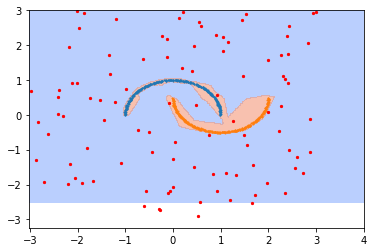

In [9]:
X_gen = ssgan.generate_random_samples(100)
plt.close()
fig, ax = plt.subplots()
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, ssgan, xx,yy,cmap=plt.cm.coolwarm, alpha=0.6)
plt.scatter(X_train[y_train==0][:,0],X_train[y_train==0][:,1],s=1)
plt.scatter(X_train[y_train==1][:,0],X_train[y_train==1][:,1],s=1)
plt.scatter(X_gen[:,0],X_gen[:,1],c='r',s=5)
plt.show()